In [2]:
# Create col that is a prediction percentage
# Create col of binary prediction
# Compare to outcome with confusion matrix

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Diabetes = pd.read_csv('diabetes.csv')
D = Diabetes 

In [4]:
Diabetes.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
from sklearn.impute import KNNImputer
# Impute data for predictive models. KNNImputer works better than median because some predictors are skewed

cols = ['BMI', 'Insulin', 'BloodPressure', 'SkinThickness', 'Glucose']
for col in cols:
    Diabetes[col] = Diabetes[col].replace(0, np.nan)

imputer = KNNImputer(n_neighbors=5, weights='uniform')
DiabetesImputed = pd.DataFrame(imputer.fit_transform(Diabetes), columns=Diabetes.columns)
DiabetesImputed[cols] = DiabetesImputed[cols].astype(Diabetes[cols].dtypes)

DiabetesImputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [6]:
Diabetes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


<Axes: >

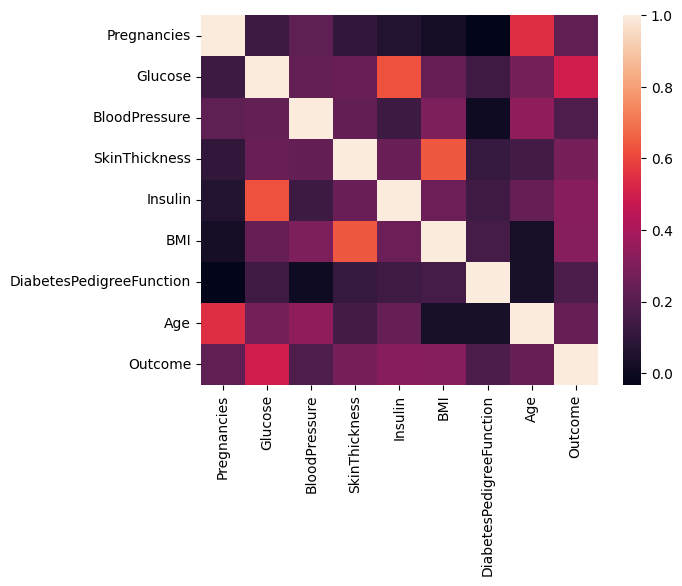

In [7]:
sns.heatmap(DiabetesImputed.corr())


- Glucose is the strongest predictor of diabetes
- Insulin and Glucose have a stronger linear relationship
- Skin Thickness and BMI have a stronger linear relationship
- Pregancies and Age have a positive linear relationship


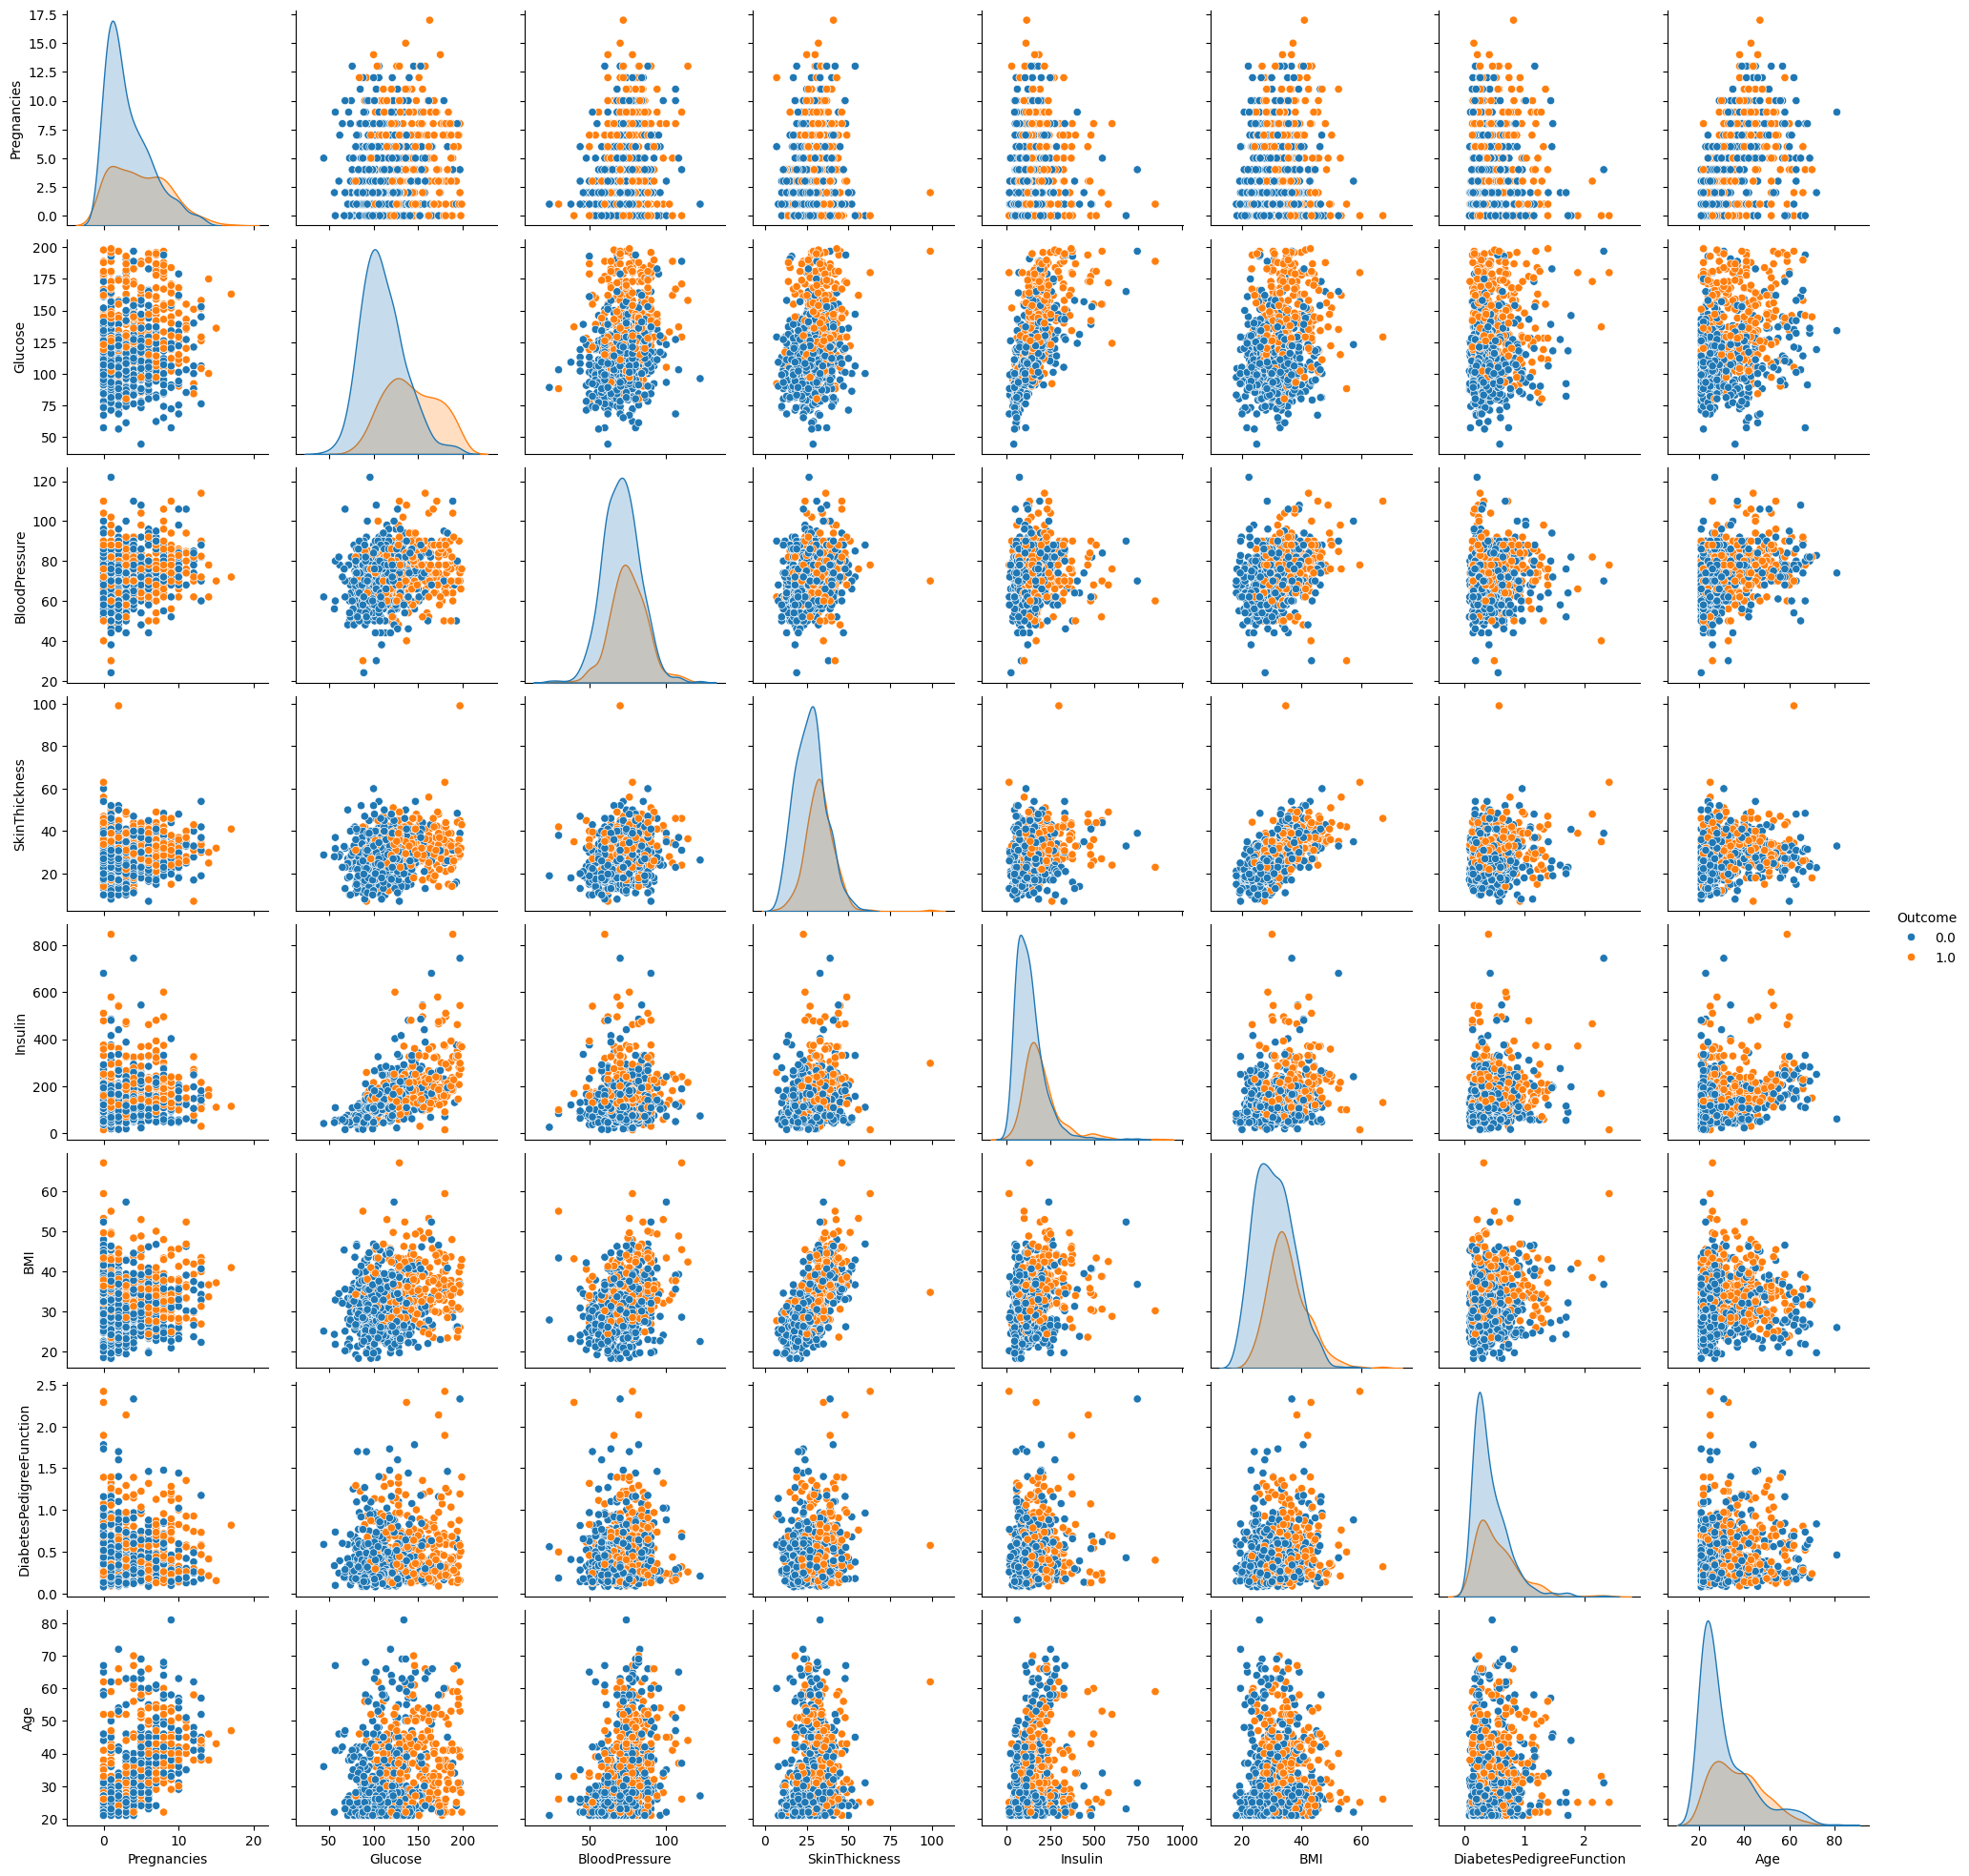

In [8]:
sns.pairplot(DiabetesImputed, hue='Outcome', diag_kind='kde')
plt.show()

# Build train/test datasets

In [9]:
from sklearn.model_selection import train_test_split 

# Develop train and test data and preprocess missing data. Pregnancies expects 0 values sometimes.
X = Diabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y = Diabetes['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size=0.2)

X_imputed = DiabetesImputed[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y_imputed = DiabetesImputed['Outcome'].values
X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = train_test_split(X_imputed, y_imputed, stratify=y_imputed, random_state=0, test_size=0.2)

- Glucose tends to be higher when a person has diabetes

# How can we assess each entry and categorize them by risk groups (LO, MED, HI) based on health indicators?

In [10]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from matplotlib.colors import ListedColormap


X = Diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age', 'Pregnancies']].values
y = Diabetes['Outcome'].values


# y_pred = knn.predict(X_test)
# accuracy = (y_pred == y_test.ravel()).mean()
# print(accuracy)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

h=.02


for weights in ['uniform', 'distance']:
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_imputed, y_train_imputed.ravel())
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn.predict(X_test)
    
plt.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN(3)")
plt.show()
    
    

ValueError: arange: cannot compute length

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

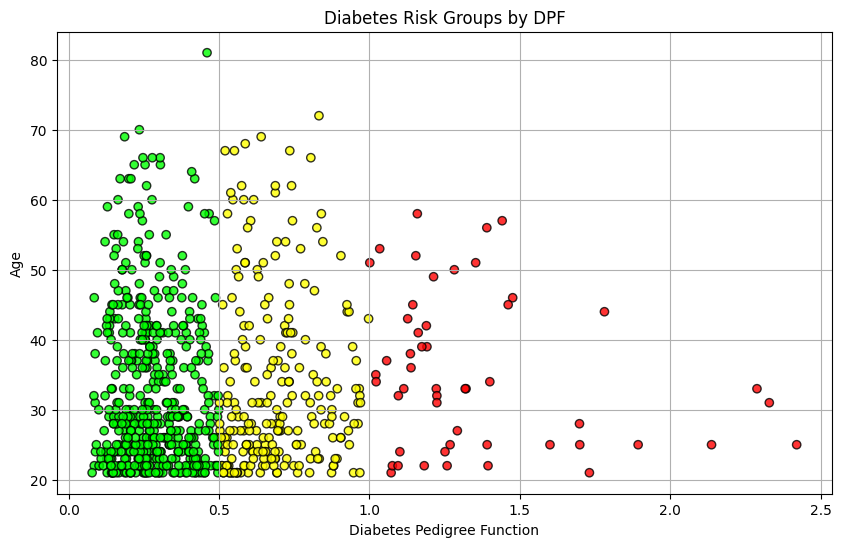

In [ ]:
dpf = Diabetes['DiabetesPedigreeFunction'].values
age = Diabetes['Age'].values  

risk_group = np.where(dpf < 0.5, 'Low', np.where(dpf < 1.0, 'Medium', 'High'))

colors = {'Low': '#00FF00', 'Medium': '#FFFF00', 'High': '#FF0000'}
color_map = [colors[risk] for risk in risk_group]

plt.figure(figsize=(10, 6))
plt.scatter(dpf, age, c=color_map, edgecolor='k', alpha=0.8)
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Age')
plt.title('Diabetes Risk Groups by DPF')
plt.grid(True)
plt.colorbar(plt.cm.ScalarMappable(cmap=ListedColormap(colors.values())), 
             label='Risk Groups', ticks=[0.33, 0.66, 1.0])

for group, color in colors.items():
    plt.scatter([], [], color=color, label=f'{group} Risk')
plt.legend()
plt.show()

In [ ]:
# Classification by pedigree
# 0 <= LO < 0.333
# 333 <= MED <= 0.666
# 0.666 < HI <= 1 

In [ ]:
from sklearn.metrics import classification_report

DiabetesClassifier = DiabetesImputed
DiabetesClassifier['score'] = -1

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_imputed, y_train_imputed)

y_pred = knn.predict(X_test_imputed)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



RiskGroup
2    277
3    276
1    215
Name: count, dtype: int64


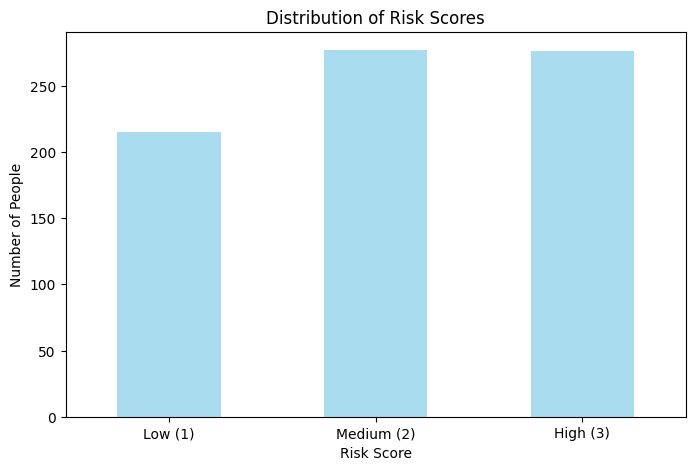

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def categorize_risk(row, means):
    score = sum(row[feature] > mean for feature, mean in means.items())
    if score <= 2:
        return 1
    if score <= 4:
        return 2
    ## Group 3 accuracy increases as its min score threshold increases
    else:
        return 3

Diabetes['RiskGroup'] = Diabetes.apply(categorize_risk, means=means, axis=1)

print(Diabetes['RiskGroup'].value_counts())
plt.figure(figsize=(8, 5))
Diabetes['RiskGroup'].value_counts().sort_index().plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Distribution of Risk Scores')
plt.xlabel('Risk Score')
plt.ylabel('Number of People')
plt.xticks(ticks=[0, 1, 2], labels=['Low (1)', 'Medium (2)', 'High (3)'], rotation=0)
plt.show()

# What is the relationship between BMI and insulin when predicting diabetes risk?

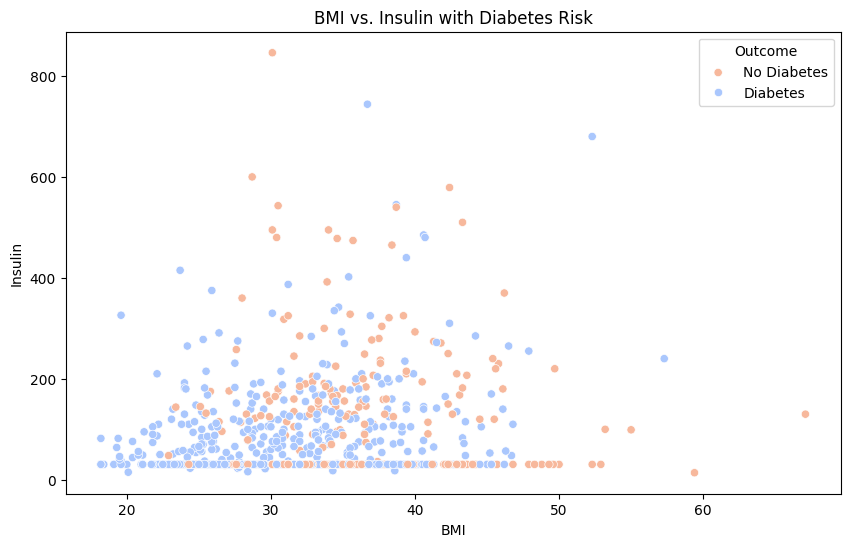

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Diabetes['BMI'] = Diabetes['BMI'].replace(0, Diabetes['BMI'].median())
Diabetes['Insulin'] = Diabetes['Insulin'].replace(0, Diabetes['Insulin'].median())

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Diabetes['BMI'], y=Diabetes['Insulin'], hue=Diabetes['Outcome'], palette='coolwarm')
plt.title("BMI vs. Insulin with Diabetes Risk")
plt.xlabel("BMI")
plt.ylabel("Insulin")
plt.legend(title="Outcome", labels=["No Diabetes", "Diabetes"])
plt.show()


In [ ]:
correlation = Diabetes['BMI'].corr(Diabetes['Insulin'])
print(f"Pearson Correlation between BMI and Insulin: {correlation:.2f}")


Pearson Correlation between BMI and Insulin: 0.19


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = Diabetes[['BMI', 'Insulin']]
y = Diabetes['Outcome']

X['BMI'] = X['BMI'].replace(0, X['BMI'].median())
X['Insulin'] = X['Insulin'].replace(0, X['Insulin'].median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.87      0.77       151
           1       0.52      0.28      0.36        80

    accuracy                           0.66       231
   macro avg       0.61      0.57      0.57       231
weighted avg       0.63      0.66      0.63       231



C:\Users\woody\AppData\Local\Temp\ipykernel_1840\3085782424.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['BMI'] = X['BMI'].replace(0, X['BMI'].median())
C:\Users\woody\AppData\Local\Temp\ipykernel_1840\3085782424.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Insulin'] = X['Insulin'].replace(0, X['Insulin'].median())


# How are age and pregnancies related to diabetes risk?

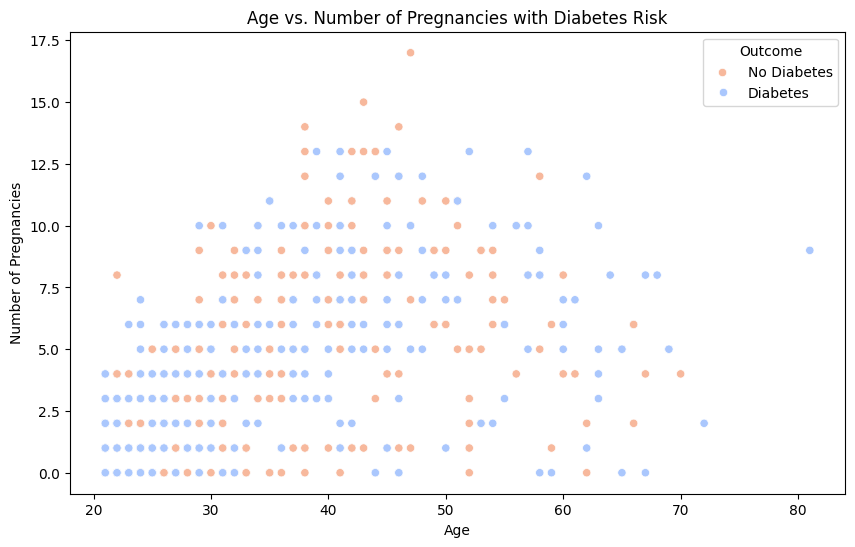

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Diabetes['Age'], y=Diabetes['Pregnancies'], hue=Diabetes['Outcome'], palette='coolwarm')
plt.title("Age vs. Number of Pregnancies with Diabetes Risk")
plt.xlabel("Age")
plt.ylabel("Number of Pregnancies")
plt.legend(title="Outcome", labels=["No Diabetes", "Diabetes"])
plt.show()


In [ ]:
correlation = Diabetes['Age'].corr(Diabetes['Pregnancies'])
print(f"Pearson Correlation between Age and Number of Pregnancies: {correlation:.2f}")


Pearson Correlation between Age and Number of Pregnancies: 0.54


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = Diabetes[['Age', 'Pregnancies']]
y = Diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.85      0.76       151
           1       0.49      0.26      0.34        80

    accuracy                           0.65       231
   macro avg       0.59      0.56      0.55       231
weighted avg       0.62      0.65      0.62       231



# How does the performance of different predictive models compare: Logistic regression vs decision trie vs neural network?

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

def cv(X_train, y_train):
    names = [
        'Logistic Regression',
        'KNN',
        'SVM',
        'Decision Trie',
        'Random Forest',
        'Neural Network',
    ]
    
    classifiers = [
        LogisticRegression(max_iter=1000),
        KNeighborsClassifier(),
        SVC(), 
        DecisionTreeClassifier(),
        RandomForestClassifier(max_depth=4),
        MLPClassifier(hidden_layer_sizes=(100, ), max_iter=500, random_state=42),
    ]
    res = {}
    for name, clf in zip(names, classifiers):
        scores = cross_val_score(clf, X_train, y_train, cv=5)
        res[name] = scores
    for name, scores in res.items():
        print("%20s | accuracy %0.3f%% (+/- %0.2f%%)" % (name, 100 * scores.mean(), 100 * scores.std() * 2))

cv(X_train_imputed, y_train_imputed)

 Logistic Regression | accuracy 76.551% (+/- 5.33%)
                 KNN | accuracy 71.825% (+/- 1.24%)
                 SVM | accuracy 74.432% (+/- 3.75%)
       Decision Trie | accuracy 69.208% (+/- 6.67%)
       Random Forest | accuracy 76.055% (+/- 3.61%)
      Neural Network | accuracy 68.075% (+/- 6.51%)


## We will further explore the KNN, Logistic Regression and Random Forest models for predicting the presence of diabetes

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

def tune_hyperparameters(X_train, y_train):
    names = [
        'Logistic Regression',
        'KNN',  
        'Random Forest', 
    ]
    
    classifiers = [
        LogisticRegression(max_iter=1000),
        KNeighborsClassifier(), 
        RandomForestClassifier(max_depth=4), 
    ]
    
    param_grids = {
        'Logistic Regression': {
            'C': [0.1, 0.2, 0.5, 0.8, 1, 2, 3, 5, 7, 9, 10],
            'solver': ['liblinear', 'lbfgs']
        },
        'KNN': {
            'n_neighbors': np.arange(1, 50),
            'weights': ['uniform', 'distance']
        }, 
        'Random Forest': {
            'n_estimators': np.arange(1, 20),
            'max_depth': [3, 5, 7, 10],
            'min_samples_split': [2, 5, 10]
        }, 
    }
    
    best_params = {}
    for name, clf in zip(names, classifiers): 
        grid_search = GridSearchCV(clf, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        best_params[name] = {
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_,
            'score_std': grid_search.cv_results_['std_test_score'][grid_search.best_index_]
        }
        
    for name, result in best_params.items():
        print(f"\n{name} Best Parameters: {result['best_params']}")
        print(f"Cross-validation Accuracy: {result['best_score']*100:.3f}%")
        print(f"Cross-validation Accuracy Variance: {result['score_std']*100:.3f}%")
 
tune_hyperparameters(X_train_imputed, y_train_imputed)



Logistic Regression Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Cross-validation Accuracy: 76.552%
Cross-validation Accuracy Variance: 2.604%

KNN Best Parameters: {'n_neighbors': 47, 'weights': 'distance'}
Cross-validation Accuracy: 75.405%
Cross-validation Accuracy Variance: 2.994%

Random Forest Best Parameters: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 18}
Cross-validation Accuracy: 77.196%
Cross-validation Accuracy Variance: 1.819%


c:\Users\woody\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Accuracy: 75.97%


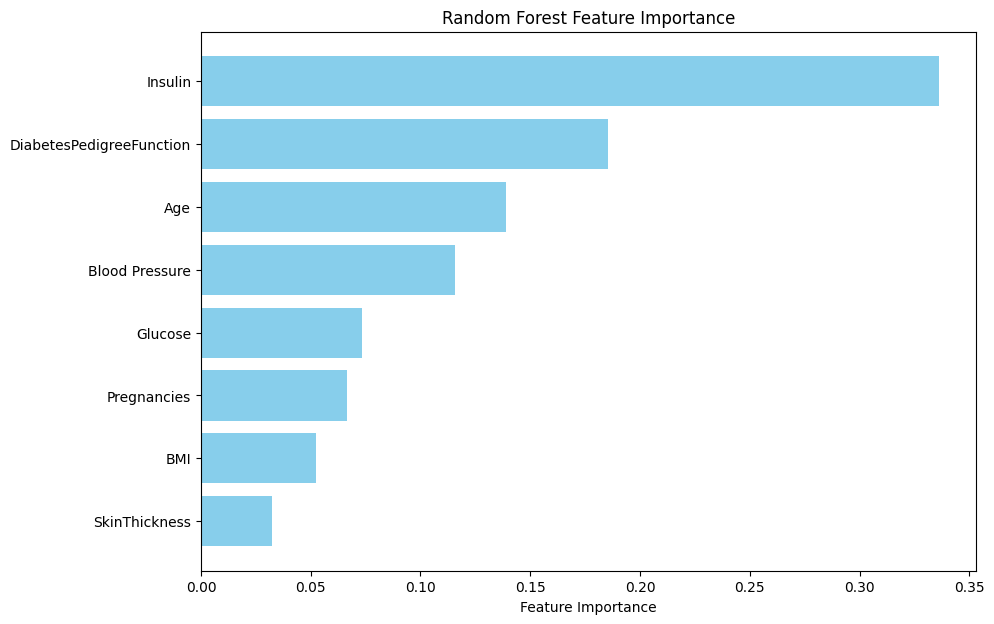

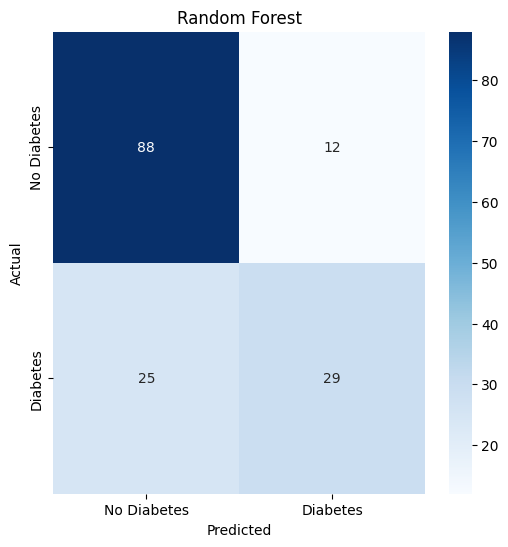

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=4)
rf.fit(X_train_imputed, y_train_imputed)

y_pred = rf.predict(X_test_imputed)

accuracy = accuracy_score(y_test_imputed, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

features = pd.DataFrame(X_train_imputed, columns=['BMI', 'Insulin', 'SkinThickness', 'Glucose', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies', 'Blood Pressure'])

importances = rf.feature_importances_

sorted_idx = importances.argsort()

plt.figure(figsize=(10, 7))
plt.barh(features.columns[sorted_idx], importances[sorted_idx], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

conf_matrix = confusion_matrix(y_test_imputed, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest')
plt.show()


Accuracy: 73.38%


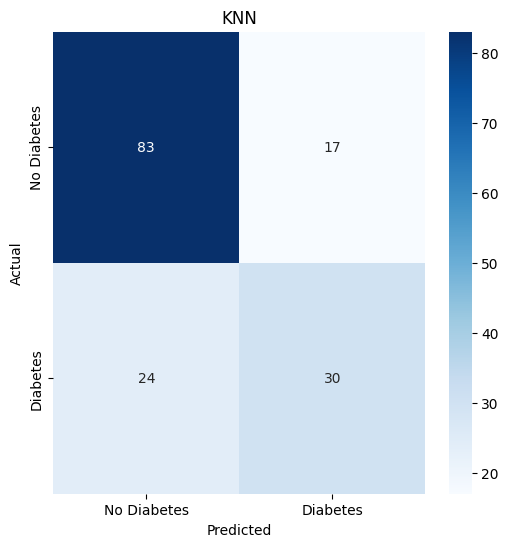

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
 


plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN')
plt.show()


Accuracy: 75.97%


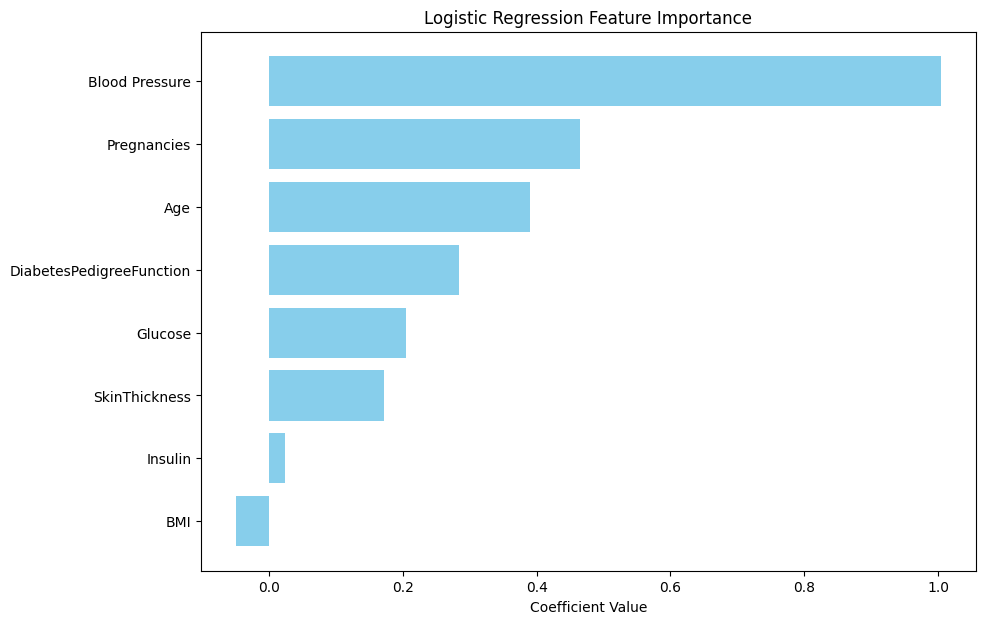

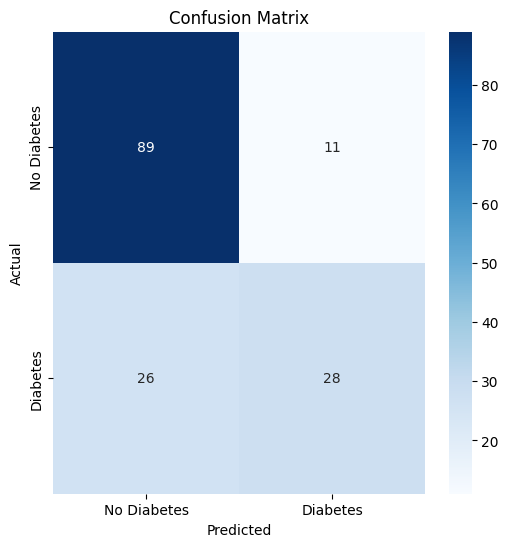

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)
 
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train_imputed)
 
y_pred = log_reg.predict(X_test_scaled)
 
accuracy = accuracy_score(y_test_imputed, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

coefficients = log_reg.coef_[0]
sorted_idx = coefficients.argsort()


plt.figure(figsize=(10, 7))
plt.barh(range(len(coefficients)), coefficients[sorted_idx], color='skyblue')
plt.yticks(range(len(coefficients)), ['BMI', 'Insulin', 'SkinThickness', 'Glucose', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies', 'Blood Pressure'])
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Feature Importance')
plt.show()

conf_matrix = confusion_matrix(y_test_imputed, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
X_train_i = pd.DataFrame(X_train_scaled, columns=['BMI', 'Insulin', 'SkinThickness', 'Glucose', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies', 'BloodPressure']).drop(columns=['Insulin'])
X_test_i = pd.DataFrame(X_test_scaled, columns=['BMI', 'Insulin', 'SkinThickness', 'Glucose', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies', 'BloodPressure']).drop(columns=['Insulin'])

log_reg.fit(X_train_i, y_train_imputed)
 
y_pred = log_reg.predict(X_test_i)
 
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=4)
knn = KNeighborsClassifier()

models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "KNN": knn
}

for name, model in models.items():
    scores = cross_val_score(model, X_train_i, y_train_imputed, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy: {scores.mean() * 100:.2f}%, Std Dev: {scores.std() * 100:.2f}%")

Logistic Regression: Mean Accuracy: 72.31%, Std Dev: 1.73%
Random Forest: Mean Accuracy: 72.97%, Std Dev: 2.69%
KNN: Mean Accuracy: 69.54%, Std Dev: 5.74%


- Logistic Regression accuracy drops by 5%
- RF accuracy drops by 4%
- KNN accuracy drops by 7%

Given the consistent drop in accuracy and increase in variance, Insulin is an important feature. 

In [ ]:
missing_insulin = Diabetes['Insulin'] == 0

Diabetes['Insulin_Test'] = missing_insulin.astype(int)

continuous_columns = ['Age', 'BMI', 'Pregnancies']
for col in continuous_columns:
    print(f"Correlation between {col} and Insulin Test:")
    print(Diabetes[[col, 'Insulin_Test']].corr())

categorical_columns = ['Outcome']
for col in categorical_columns:
    print(f"Chi-square test between {col} and Insulin Test:")
    contingency_table = pd.crosstab(Diabetes[col], Diabetes['Insulin_Test'])
    print(contingency_table)
    from scipy.stats import chi2_contingency
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test p-value: {p}")
    
    # Chi > 0.05 indicating the absence of insulin isn't significantly related to the outcome


NameError: name 'Diabetes' is not defined

# What is the most important factor in predecting whether someone is diabetic?

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

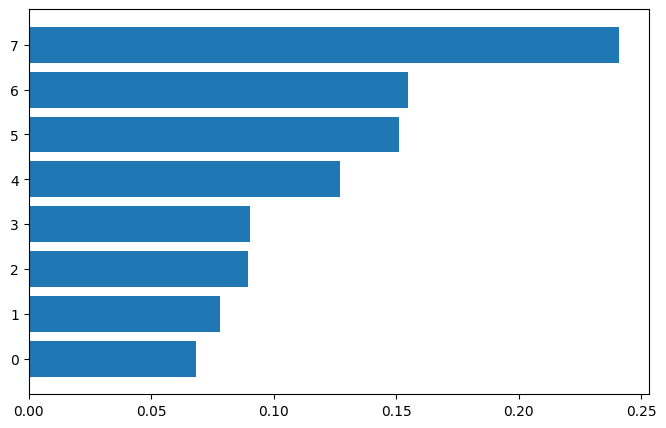

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
factor = model.feature_importances_
indices = np.argsort(factor)
plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), factor[indices])
plt.yticks(range(len(indices)), X_train.columns[indices])



In [ ]:
def predict_diabetes(bmi, insulin, age, glucose, blood_pressure, skin_thickness, pregnancies):
    input_data = [[glucose, blood_pressure, skin_thickness, insulin, bmi, age, pregnancies]]
    
    prediction = rf.predict(input_data)
    
    if prediction[0] == 0:
        return "No Diabetes"
    else:
        return "Diabetes"

bmi = 55.0
insulin = 120.0
age = 45
glucose = 130.0
blood_pressure = 80
skin_thickness = 20
pregnancies = 3

outcome = predict_diabetes(bmi, insulin, age, glucose, blood_pressure, skin_thickness, pregnancies)
print(f"The predicted outcome for the person is: {outcome}")


The predicted outcome for the person is: Diabetes


c:\Users\woody\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Scientifically, the presence of diabetes is described to be due to a genetic mutation which causes β-cell dysfunction, which results in obesity and insulin resistance. How important are these predictors?

In [ ]:
cols = ['BMI', 'Insulin', 'BloodPressure', 'SkinThickness', 'Glucose']
for col in cols:
    Diabetes[col] = Diabetes[col].replace(0, np.nan)

imputer = KNNImputer(n_neighbors=5, weights='uniform')
DiabetesImputed = pd.DataFrame(imputer.fit_transform(Diabetes), columns=Diabetes.columns)
DiabetesImputed[cols] = DiabetesImputed[cols].astype(Diabetes[cols].dtypes)

X = DiabetesImputed.drop(columns=['Outcome'])
# X = DiabetesImputed[['Insulin', 'BMI']]
y = Diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


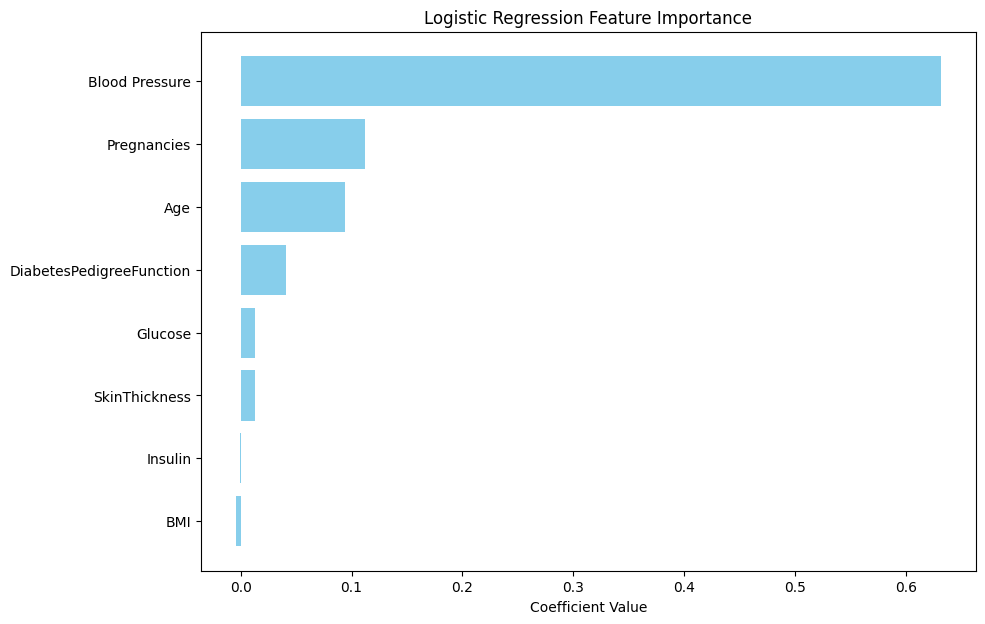

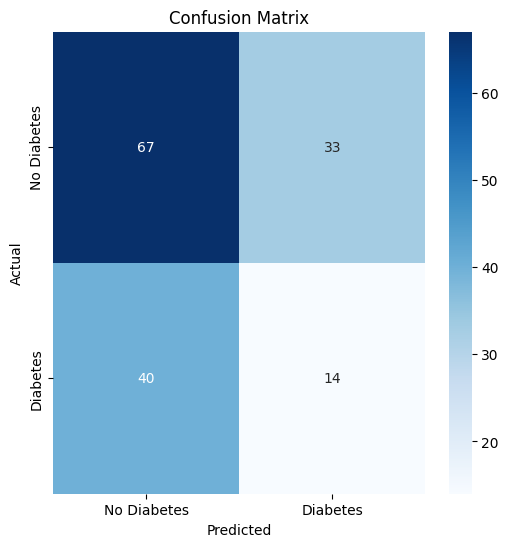

Accuracy: 69.48%


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
 
y_pred = log_reg.predict(X_test)
 

coefficients = log_reg.coef_[0]
sorted_idx = coefficients.argsort()


plt.figure(figsize=(10, 7))
plt.barh(range(len(coefficients)), coefficients[sorted_idx], color='skyblue')
plt.yticks(range(len(coefficients)), ['BMI', 'Insulin', 'SkinThickness', 'Glucose', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies', 'Blood Pressure'])
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Feature Importance')
plt.show()

conf_matrix = confusion_matrix(y_test_imputed, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 69% accuracy vs 53%
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

In [ ]:
# p-values / coef
import statsmodels.api as sm

X_with_intercept = sm.add_constant(X_train)

model_sm = sm.Logit(y_train, X_with_intercept)
result = model_sm.fit()

print(result.summary())

# A p value <= 0.05 is deemed significant
# Higher coef = higher significance

Optimization terminated successfully.
         Current function value: 0.451685
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.3014
Time:                        16:36:24   Log-Likelihood:                -277.33
converged:                       True   LL-Null:                       -396.97
Covariance Type:            nonrobust   LLR p-value:                 3.224e-47
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -9.9982      0.972    -10.281      0.000     -11.904

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

feature_importance = rf_model.feature_importances_
 
for feature, importance in zip(X.columns, feature_importance):
    print(f"Feature: {feature}, Importance: {importance}")


Feature: Pregnancies, Importance: 0.1215866282028409
Feature: Glucose, Importance: 0.2663128427795675
Feature: BloodPressure, Importance: 0.08864555262057809
Feature: SkinThickness, Importance: 0.11350412412021275
Feature: BMI, Importance: 0.13353403578243594
Feature: DiabetesPedigreeFunction, Importance: 0.11835685920878664
Feature: Age, Importance: 0.1580599572855781


In [ ]:
corr_matrix = X.join(y).corr()
print(corr_matrix['Outcome'])


Pregnancies                 0.258846
Glucose                     0.515819
BloodPressure               0.192819
SkinThickness               0.257854
BMI                         0.271093
DiabetesPedigreeFunction    0.200759
Age                         0.352982
Outcome                     1.000000
Name: Outcome, dtype: float64
